In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from category_encoders import CountEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [286]:
train = pd.read_csv(r"C:\Users\Ecjoee\Downloads\cipla\datasets\train.csv")
test = pd.read_csv(r"C:\Users\Ecjoee\Downloads\cipla\datasets\test.csv")

In [134]:
print("Train size:",train.shape,"\nTest size: ",test.shape)

Train size: (30000, 24) 
Test size:  (20000, 23)


In [135]:
train.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [136]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [137]:
train.drop(['Customer ID', 'Name', 'Property ID'], axis=1, inplace=True)
test.drop(['Customer ID', 'Name', 'Property ID'], axis=1, inplace=True)

In [138]:
# train = train.dropna(subset=['Loan Sanction Amount (USD)','Income (USD)'])
# test = test.dropna(subset=['Loan SIncome (USD)'])

In [139]:
test.isnull().sum()

Gender                           31
Age                               0
Income (USD)                    750
Income Stability                813
Profession                        0
Type of Employment             4689
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Dependents                     1142
Credit Score                    743
No. of Defaults                   0
Has Active Credit Card         1076
Property Age                    892
Property Type                     0
Property Location               160
Co-Applicant                      0
Property Price                    0
dtype: int64

In [140]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [141]:
def remove_duplicates(data):
    data.drop_duplicates(keep="first",inplace=True)
#     return data
remove_duplicates(train)
remove_duplicates(test)

In [142]:
for col in train.select_dtypes('object').columns:
    print(f"***********************{col}****************************")
    print(train[col].value_counts())
    print(train[col].unique())

***********************Gender****************************
M    15053
F    14894
Name: Gender, dtype: int64
['F' 'M' nan]
***********************Income Stability****************************
Low     25751
High     2566
Name: Income Stability, dtype: int64
['Low' 'High' nan]
***********************Profession****************************
Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
***********************Type of Employment****************************
Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    

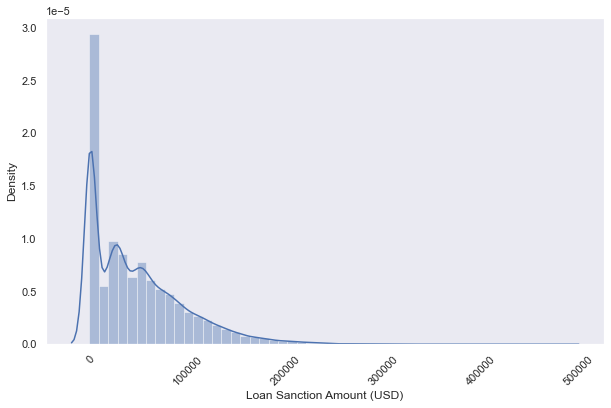

In [143]:
sns.set(style='dark',)
fig=plt.subplots(figsize=(10,6))
sns.distplot((train['Loan Sanction Amount (USD)']))
plt.xticks(rotation=45)
plt.show()

In [144]:
train['Loan Sanction Amount (USD)']=train['Loan Sanction Amount (USD)'].fillna(train['Loan Sanction Amount (USD)'].median())

In [145]:
target = train['Loan Sanction Amount (USD)']
train = train.drop(['Loan Sanction Amount (USD)'], axis=1)

In [146]:
train.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91


In [147]:
test.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,3472.69,2,Urban,1,236644.5
1,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,1184.84,1,Rural,1,142357.3
2,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1266.27,1,Urban,1,300991.24
3,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,1369.72,1,Semi-Urban,0,125612.1
4,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,1939.23,4,Semi-Urban,1,180908.0


In [148]:
def join_df(train,test):
    
    df = pd.concat([train,test],axis=0).reset_index(drop=True)
    
    features = [c for c in df.columns]
    
    return df,features

In [149]:
df, features = join_df(train,test)

In [150]:
df.isnull().sum()

Gender                            84
Age                                0
Income (USD)                    5326
Income Stability                2496
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3635
Credit Score                    2446
No. of Defaults                    0
Has Active Credit Card          2642
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
dtype: int64

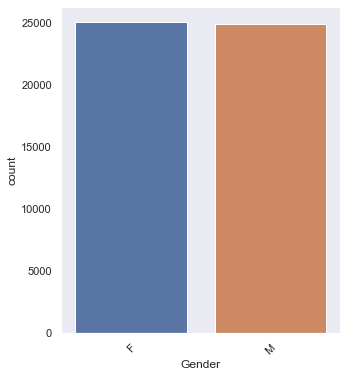

In [151]:
fig=plt.subplots(figsize=(5,6))
sns.countplot('Gender', data=df, orient="v")
plt.xticks(rotation=45)
plt.show()

In [152]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [153]:
df['Income (USD)'] = df['Income (USD)'].astype('float64')

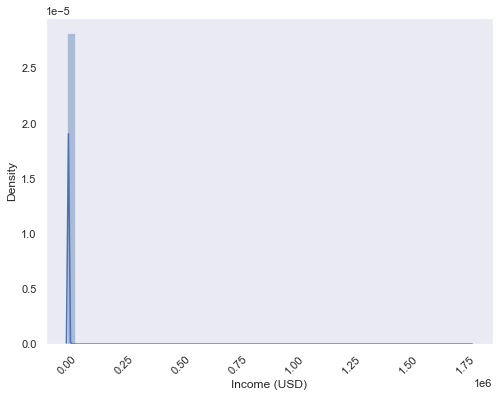

In [154]:
sns.set(style='dark',)
fig=plt.subplots(figsize=(8,6))
sns.distplot((df['Income (USD)']))
plt.xticks(rotation=45)
plt.show()

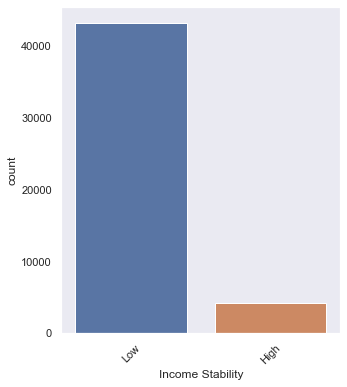

In [155]:
sns.set(style='dark',)
fig=plt.subplots(figsize=(5,6))
sns.countplot((df['Income Stability']))
plt.xticks(rotation=45)
plt.show()

In [156]:
df['Income (USD)']=df['Income (USD)'].fillna(df['Income (USD)'].median())
df['Income Stability']=df['Income Stability'].fillna(df['Income Stability'].mode()[0])

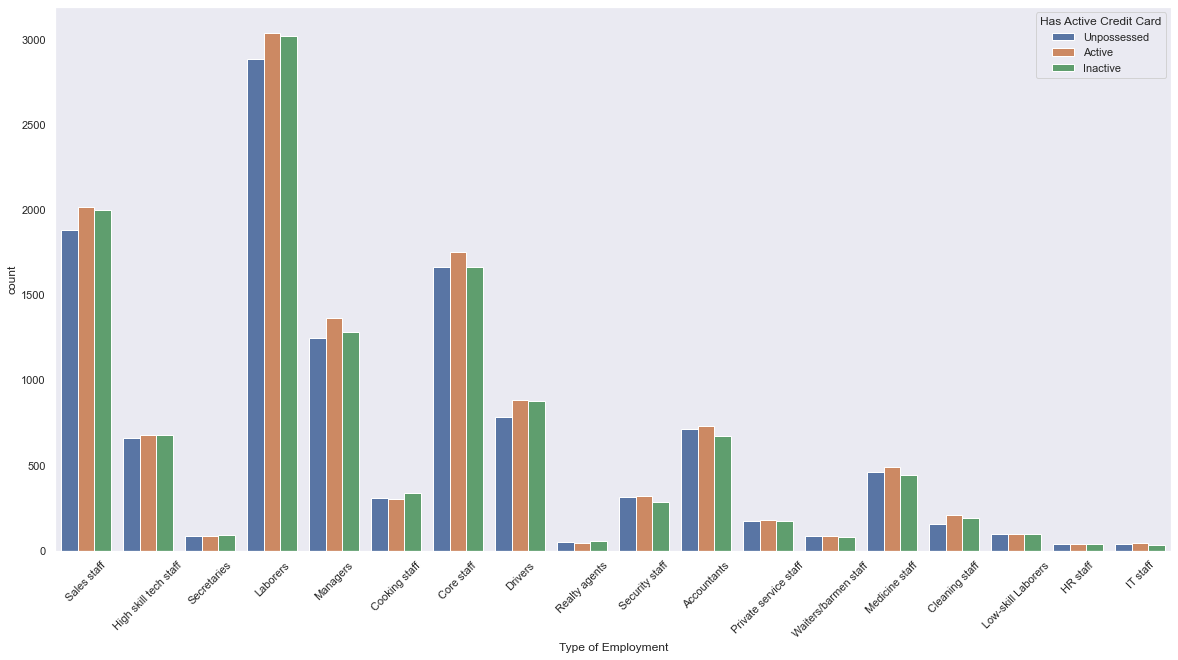

In [157]:
fig=plt.subplots(figsize=(20,10))
sns.countplot('Type of Employment', data=df, orient="v", hue="Has Active Credit Card")
plt.xticks(rotation=45)
plt.show()

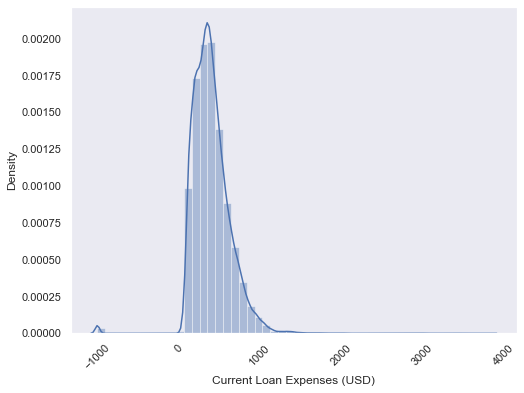

In [158]:
sns.set(style='dark',)
fig=plt.subplots(figsize=(8,6))
sns.distplot((df['Current Loan Expenses (USD)']))
plt.xticks(rotation=45)
plt.show()

In [159]:
df['Type of Employment'] = df['Type of Employment'].fillna("None")

In [160]:
df['Current Loan Expenses (USD)'] = df['Current Loan Expenses (USD)'].fillna(df['Current Loan Expenses (USD)'].median())

In [161]:
df['Dependents'].unique()

array([ 3.,  1.,  2., nan,  4.,  5.,  8.,  6.,  7., 10., 14., 13.])

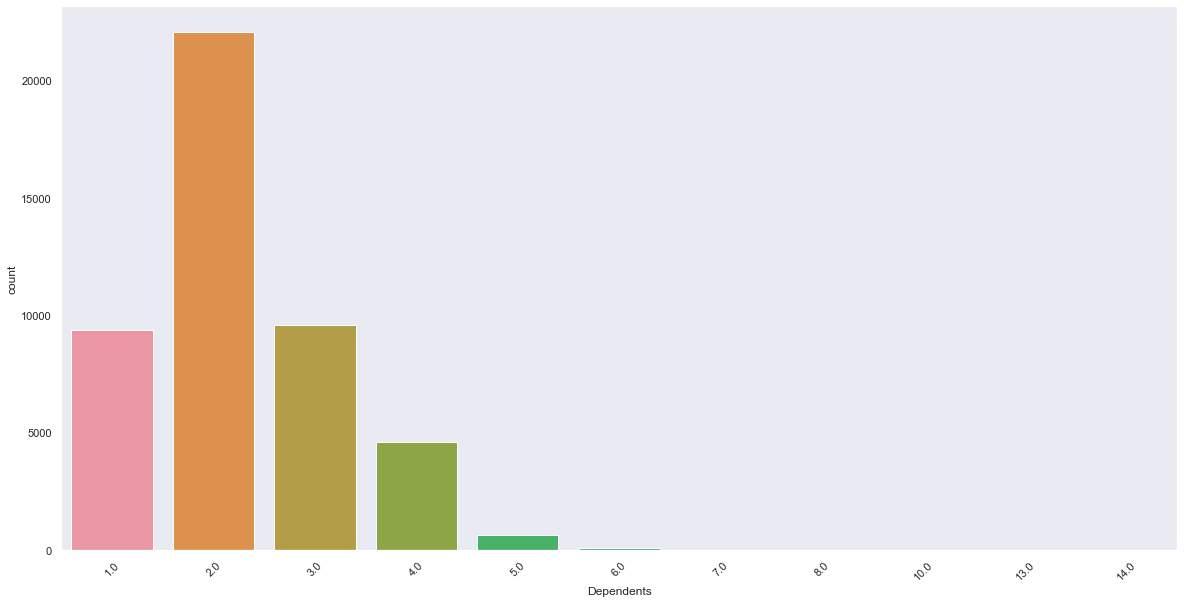

In [162]:
fig=plt.subplots(figsize=(20,10))
sns.countplot('Dependents', data=df)
plt.xticks(rotation=45)
plt.show()

In [163]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

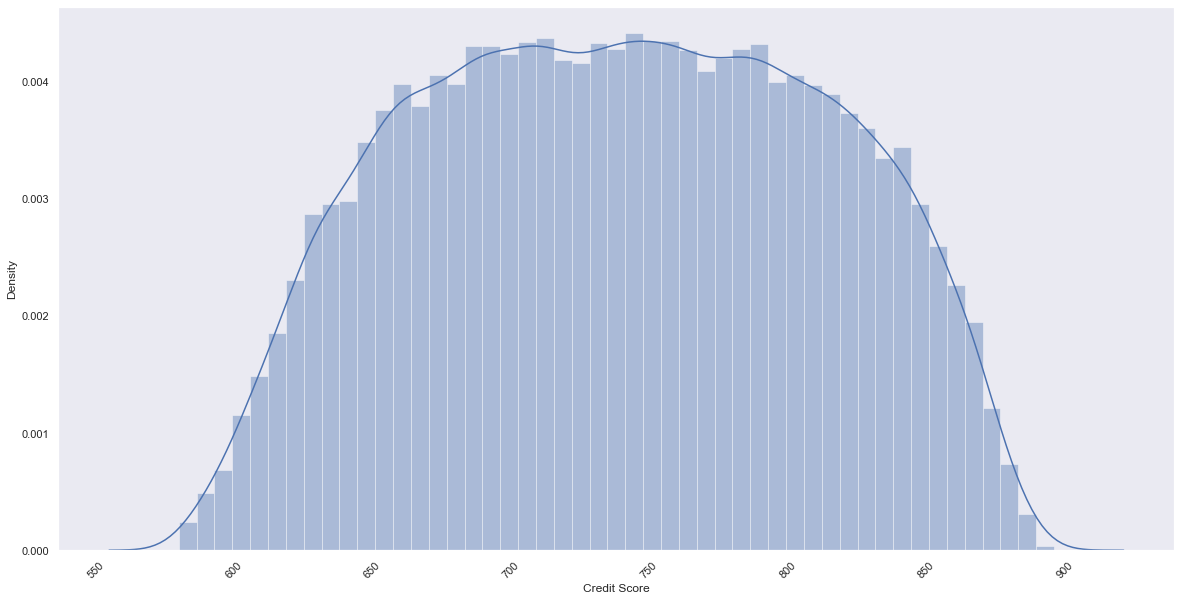

In [164]:
fig=plt.subplots(figsize=(20,10))
sns.distplot(df['Credit Score'])
plt.xticks(rotation=45)
plt.show()

In [165]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())

In [166]:
df.isnull().sum()

Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card         2642
Property Age                   5742
Property Type                     0
Property Location               516
Co-Applicant                      0
Property Price                    0
dtype: int64

In [167]:
df['Has Active Credit Card'].unique()

array([nan, 'Unpossessed', 'Active', 'Inactive'], dtype=object)

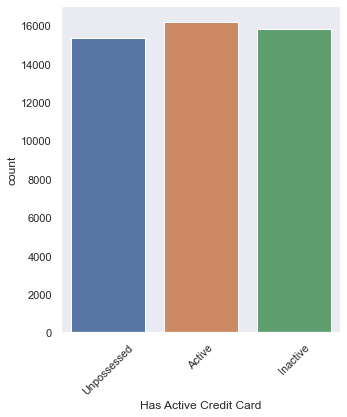

In [168]:
fig=plt.subplots(figsize=(5,6))
sns.countplot(df['Has Active Credit Card'])
plt.xticks(rotation=45)
plt.show()

In [169]:
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode()[0])

In [170]:
df['Property Age'].unique()

array([1933.05, 4952.91,  988.19, ..., 2019.78, 2252.03, 5233.16])

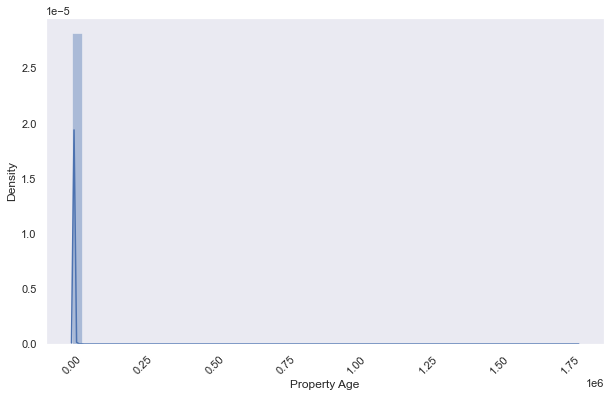

In [171]:
fig=plt.subplots(figsize=(10,6))
sns.distplot(df['Property Age'])
plt.xticks(rotation=45)
plt.show()

In [172]:
df['Property Age'] = df['Property Age'].fillna(df['Property Age'].median())

In [173]:
df['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban', nan], dtype=object)

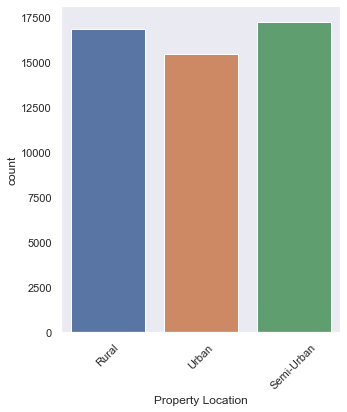

In [174]:
fig=plt.subplots(figsize=(5,6))
sns.countplot(df['Property Location'])
plt.xticks(rotation=45)
plt.show()

In [175]:
df['Property Location'] = df['Property Location'].fillna(df['Property Location'].mode()[0])

In [176]:
df['Property Price']

0        119933.46
1          54791.0
2         72440.58
3        121441.51
4        208567.91
           ...    
49995     212778.0
49996     90816.95
49997     21566.27
49998    120281.17
49999    133425.43
Name: Property Price, Length: 50000, dtype: object

In [177]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [178]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,Active,1933.05,4,Rural,1,119933.46
1,M,32,4952.910,Low,Working,None,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.0
2,F,65,988.190,High,Pensioner,None,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58
3,F,65,2223.135,High,Pensioner,None,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,2222.37,2,Semi-Urban,1,121441.51
4,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,2.0,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91


In [179]:
for col in df.columns:
    print(f"************{col}***************")
    print(f"{df[col].unique()}")

************Gender***************
['F' 'M']
************Age***************
[56 32 65 31 60 43 45 38 18 39 48 61 54 64 41 19 44 24 55 63 23 29 28 49
 30 37 51 27 59 62 21 33 58 25 26 50 46 22 36 53 34 40 35 42 57 47 52 20]
************Income (USD)***************
[1933.05 4952.91  988.19 ... 2019.78 2252.03 5233.16]
************Income Stability***************
['Low' 'High']
************Profession***************
['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
************Type of Employment***************
['Sales staff' 'None' 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']
************Location***************
['Semi-Urban' 'Rural' 'Urban']
************Loan Amount Request (USD)***************
[ 728

In [191]:
df['Co-Applicant'].replace({-999:-1,'?':-1},inplace=True)

In [192]:
cols=['Gender', 'Income Stability', 'Expense Type 1', 'Expense Type 2']
for i in cols:
    df[i]=pd.get_dummies(df[i], drop_first=True)

In [193]:
yes = np.where(df['Expense Type 1']==df['Expense Type 2'], 'True', 'False')
unique, count = np.unique(yes, return_counts=True)
print(unique,":",count)

['False' 'True'] : [26855 23145]


In [194]:
df.dtypes

Gender                           uint8
Age                              int64
Income (USD)                   float64
Income Stability                 uint8
Profession                       int32
Type of Employment               int32
Location                         int32
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                   uint8
Expense Type 2                   uint8
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card           int32
Property Age                     int64
Property Type                    int64
Property Location                int32
Co-Applicant                    object
Property Price                  object
dtype: object

In [204]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0,56,1933.050,1,7,15,1,72809.58,241.08,0,0,3.0,809.44,0,0,15314,3,0,1,119933.46
1,1,32,4952.910,1,7,12,1,46837.47,495.81,0,1,1.0,780.40,0,2,39079,1,0,1,54791.0
2,0,65,988.190,0,3,12,1,45593.04,171.95,0,1,1.0,833.15,0,2,1623,1,2,0,72440.58
3,0,65,2223.135,0,3,12,0,80057.92,298.54,0,1,2.0,832.70,1,2,20285,1,1,1,121441.51
4,0,31,2614.770,1,7,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,25731,3,1,1,208567.91


In [205]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Profession', 'Type of Employment', 'Location', 
      'Has Active Credit Card', 'Property Age',
      'Property Type', 'Property Location']
for i in cols:
    df[i]= le.fit_transform(df[i]) 

In [206]:
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,0,56,1933.050,1,7,15,1,72809.58,241.08,0,0,3.0,809.44,0,0,15314,3,0,1,119933.46
1,1,32,4952.910,1,7,12,1,46837.47,495.81,0,1,1.0,780.40,0,2,39079,1,0,1,54791.0
2,0,65,988.190,0,3,12,1,45593.04,171.95,0,1,1.0,833.15,0,2,1623,1,2,0,72440.58
3,0,65,2223.135,0,3,12,0,80057.92,298.54,0,1,2.0,832.70,1,2,20285,1,1,1,121441.51
4,0,31,2614.770,1,7,6,1,113858.89,491.41,0,1,2.0,745.55,1,0,25731,3,1,1,208567.91


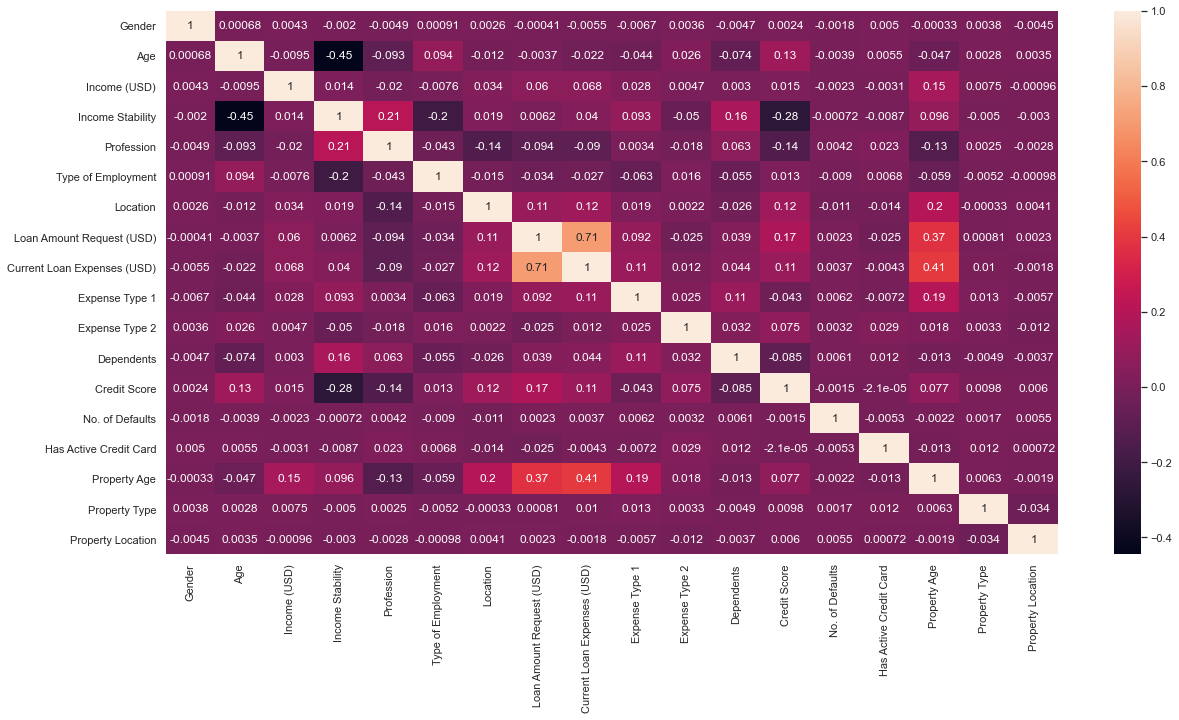

In [207]:
fig=plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [208]:
df.dtypes

Gender                           uint8
Age                              int64
Income (USD)                   float64
Income Stability                 uint8
Profession                       int64
Type of Employment               int64
Location                         int64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                   uint8
Expense Type 2                   uint8
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card           int64
Property Age                     int64
Property Type                    int64
Property Location                int64
Co-Applicant                    object
Property Price                  object
dtype: object

In [209]:
df.shape

(50000, 20)

In [210]:
target.shape

(30000,)

In [211]:
def split_data(df, train_size):
    train, test = df[:train_size].reset_index(drop=True), df[train_size:].reset_index(drop=True)
    
    features = [c for c in df.columns]
    
    return train, test, features

In [212]:
train, test, features = split_data(df, train.shape[0])

In [241]:
train['Property Price']

0        119933.46
1         54791.00
2         72440.58
3        121441.51
4        208567.91
           ...    
29995    111096.56
29996     73453.94
29997    102108.02
29998    168194.47
29999    194512.60
Name: Property Price, Length: 30000, dtype: float64

In [249]:
# test['Property Price'].isnull().sum()
test['Property Price'].replace({'?':-1},inplace=True)

In [233]:
train['Co-Applicant'] = train['Co-Applicant'].astype("int64")
test['Co-Applicant'] = test['Co-Applicant'].astype("int64")

In [244]:
train['Property Price'] = train['Property Price'].astype("float")

In [250]:
test['Property Price'] = test['Property Price'].astype("float64")

In [251]:
target.dtype

dtype('float64')

In [252]:
X_train, X_test, y_train, y_test = train_test_split(train,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [253]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(train.shape)
print(target.shape)

(24000, 20)
(6000, 20)
(24000,)
(6000,)
(30000, 20)
(30000,)


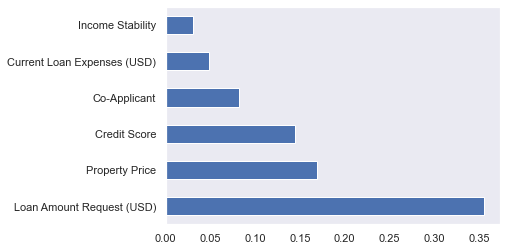

In [254]:
from sklearn.ensemble import ExtraTreesRegressor
def feature_importances(train, target):
    reg = ExtraTreesRegressor(n_estimators=100, random_state=0)
    reg.fit(train, target)
    importances = reg.feature_importances_
    final_df=pd.DataFrame({'Features':train.columns,'Importances':importances})
    final_df.set_index('Importances')
    final_df=final_df.sort_values('Importances',ascending=False)
    pd.Series(reg.feature_importances_, index=train.columns).nlargest(6).plot(kind='barh')  
    return final_df

imp = feature_importances(train, target)

In [255]:
display(imp)

,Features,Importances
7,Loan Amount Request (USD),0.356036
19,Property Price,0.168813
12,Credit Score,0.144007
18,Co-Applicant,0.081584
8,Current Loan Expenses (USD),0.048717
3,Income Stability,0.030102
15,Property Age,0.019199
1,Age,0.017182
5,Type of Employment,0.014736
2,Income (USD),0.014726


In [256]:
X_train.dtypes

Gender                           uint8
Age                              int64
Income (USD)                   float64
Income Stability                 uint8
Profession                       int64
Type of Employment               int64
Location                         int64
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                   uint8
Expense Type 2                   uint8
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card           int64
Property Age                     int64
Property Type                    int64
Property Location                int64
Co-Applicant                     int64
Property Price                 float64
dtype: object

In [257]:
y_train

21753    235683.91
251           0.00
22941     72999.90
618           0.00
17090     57256.53
           ...    
29802     86005.11
5390      65748.15
860       64283.52
15795     43445.68
23654     55597.38
Name: Loan Sanction Amount (USD), Length: 24000, dtype: float64

In [268]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators = 1000,
                    max_depth = 6,
                    learning_rate = 0.05,
                    colsample_bytree = 0.5,
                    random_state=1452,
                  )
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)

xgb_score = r2_score(y_test, xgb_pred)

print(xgb_score.mean())
print(max(0,100*r2_score(y_test,xgb_pred)))

0.7567283921702663
75.67283921702663


In [269]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators = 200,
                        learning_rate = 0.05,
                        colsample_bytree = 0.5,)
lgbm.fit(X_train, y_train)

lgbm_pred=lgbm.predict(X_test)

lgbm_score = r2_score(y_test,lgbm_pred)

print(lgbm_score.mean())
print(max(0,100*r2_score(y_test,lgbm_pred)))

0.7613264434713898
76.13264434713898


In [270]:
from catboost import CatBoostRegressor

cbc = CatBoostRegressor(n_estimators = 3000,
                       learning_rate = 0.02,
                       rsm = 0.4,
                       random_state=2054,)

cbc.fit(X_train, y_train)

cbc_pred=cbc.predict(X_test)

cbc_score = r2_score(y_test,cbc_pred)

print(cbc_score.mean())
print(max(0,100*r2_score(y_test,cbc_pred)))

0:	learn: 47332.4785007	total: 10.7ms	remaining: 32.2s
1:	learn: 46794.2639375	total: 22.2ms	remaining: 33.2s
2:	learn: 46234.9892804	total: 33.6ms	remaining: 33.5s
3:	learn: 45719.3180307	total: 45.3ms	remaining: 33.9s
4:	learn: 45183.8104163	total: 58.2ms	remaining: 34.9s
5:	learn: 44634.9081226	total: 71.1ms	remaining: 35.5s
6:	learn: 44134.3038435	total: 83.6ms	remaining: 35.7s
7:	learn: 43674.9826439	total: 96.4ms	remaining: 36.1s
8:	learn: 43217.3636049	total: 110ms	remaining: 36.5s
9:	learn: 42729.8903815	total: 123ms	remaining: 36.7s
10:	learn: 42353.9374001	total: 135ms	remaining: 36.7s
11:	learn: 41904.9513162	total: 148ms	remaining: 36.7s
12:	learn: 41430.3732040	total: 160ms	remaining: 36.8s
13:	learn: 40968.8436613	total: 174ms	remaining: 37.1s
14:	learn: 40554.6287002	total: 187ms	remaining: 37.2s
15:	learn: 40180.5967145	total: 198ms	remaining: 36.9s
16:	learn: 39775.6241291	total: 209ms	remaining: 36.7s
17:	learn: 39378.6950396	total: 220ms	remaining: 36.4s
18:	learn: 3

164:	learn: 24300.2467746	total: 1.93s	remaining: 33.1s
165:	learn: 24293.4129451	total: 1.94s	remaining: 33.1s
166:	learn: 24271.5077925	total: 1.95s	remaining: 33.1s
167:	learn: 24264.9793338	total: 1.96s	remaining: 33s
168:	learn: 24255.2211139	total: 1.97s	remaining: 33s
169:	learn: 24241.6076939	total: 2s	remaining: 33.4s
170:	learn: 24232.2914325	total: 2.02s	remaining: 33.4s
171:	learn: 24221.8288802	total: 2.03s	remaining: 33.4s
172:	learn: 24205.2213936	total: 2.05s	remaining: 33.5s
173:	learn: 24199.1588139	total: 2.06s	remaining: 33.5s
174:	learn: 24186.3019344	total: 2.08s	remaining: 33.6s
175:	learn: 24172.2465239	total: 2.1s	remaining: 33.6s
176:	learn: 24155.7428735	total: 2.11s	remaining: 33.6s
177:	learn: 24146.0745619	total: 2.12s	remaining: 33.6s
178:	learn: 24129.8146106	total: 2.13s	remaining: 33.6s
179:	learn: 24118.1914954	total: 2.14s	remaining: 33.6s
180:	learn: 24104.4575019	total: 2.15s	remaining: 33.5s
181:	learn: 24084.4562924	total: 2.16s	remaining: 33.5s


312:	learn: 23214.3494382	total: 3.63s	remaining: 31.2s
313:	learn: 23209.7132858	total: 3.65s	remaining: 31.2s
314:	learn: 23208.7140778	total: 3.66s	remaining: 31.2s
315:	learn: 23204.0599343	total: 3.67s	remaining: 31.2s
316:	learn: 23199.7955582	total: 3.68s	remaining: 31.2s
317:	learn: 23196.1600843	total: 3.69s	remaining: 31.1s
318:	learn: 23191.7488694	total: 3.71s	remaining: 31.2s
319:	learn: 23185.9264197	total: 3.72s	remaining: 31.1s
320:	learn: 23182.2537842	total: 3.73s	remaining: 31.1s
321:	learn: 23177.5463390	total: 3.74s	remaining: 31.1s
322:	learn: 23173.0696682	total: 3.75s	remaining: 31.1s
323:	learn: 23170.0353979	total: 3.77s	remaining: 31.1s
324:	learn: 23166.6312670	total: 3.78s	remaining: 31.1s
325:	learn: 23164.2019850	total: 3.79s	remaining: 31.1s
326:	learn: 23160.1457955	total: 3.8s	remaining: 31.1s
327:	learn: 23154.5368448	total: 3.81s	remaining: 31s
328:	learn: 23151.0218336	total: 3.82s	remaining: 31s
329:	learn: 23148.6905401	total: 3.83s	remaining: 31s

470:	learn: 22683.6505501	total: 5.37s	remaining: 28.8s
471:	learn: 22681.9945864	total: 5.38s	remaining: 28.8s
472:	learn: 22680.1046110	total: 5.39s	remaining: 28.8s
473:	learn: 22677.2519164	total: 5.4s	remaining: 28.8s
474:	learn: 22672.6635460	total: 5.42s	remaining: 28.8s
475:	learn: 22669.5513724	total: 5.43s	remaining: 28.8s
476:	learn: 22664.8251695	total: 5.44s	remaining: 28.8s
477:	learn: 22662.3619184	total: 5.45s	remaining: 28.7s
478:	learn: 22660.9073777	total: 5.46s	remaining: 28.7s
479:	learn: 22654.9820743	total: 5.47s	remaining: 28.7s
480:	learn: 22652.4031207	total: 5.48s	remaining: 28.7s
481:	learn: 22649.0999655	total: 5.49s	remaining: 28.7s
482:	learn: 22645.7604094	total: 5.5s	remaining: 28.7s
483:	learn: 22643.4863920	total: 5.52s	remaining: 28.7s
484:	learn: 22638.9002089	total: 5.53s	remaining: 28.7s
485:	learn: 22636.8812410	total: 5.54s	remaining: 28.7s
486:	learn: 22633.8799372	total: 5.56s	remaining: 28.7s
487:	learn: 22630.4959691	total: 5.57s	remaining: 

633:	learn: 22206.8611248	total: 7.3s	remaining: 27.2s
634:	learn: 22203.2173465	total: 7.31s	remaining: 27.2s
635:	learn: 22200.9922101	total: 7.32s	remaining: 27.2s
636:	learn: 22198.3791067	total: 7.33s	remaining: 27.2s
637:	learn: 22194.9179485	total: 7.34s	remaining: 27.2s
638:	learn: 22191.1668311	total: 7.35s	remaining: 27.2s
639:	learn: 22187.3856549	total: 7.36s	remaining: 27.1s
640:	learn: 22184.1105125	total: 7.37s	remaining: 27.1s
641:	learn: 22182.4780078	total: 7.38s	remaining: 27.1s
642:	learn: 22178.1877728	total: 7.39s	remaining: 27.1s
643:	learn: 22174.1224593	total: 7.4s	remaining: 27.1s
644:	learn: 22171.7909563	total: 7.42s	remaining: 27.1s
645:	learn: 22169.0987439	total: 7.43s	remaining: 27.1s
646:	learn: 22165.9223634	total: 7.44s	remaining: 27s
647:	learn: 22161.4921784	total: 7.45s	remaining: 27s
648:	learn: 22159.3489806	total: 7.46s	remaining: 27s
649:	learn: 22158.4703768	total: 7.47s	remaining: 27s
650:	learn: 22156.0082430	total: 7.48s	remaining: 27s
651:

785:	learn: 21818.9583036	total: 9.02s	remaining: 25.4s
786:	learn: 21815.3691849	total: 9.04s	remaining: 25.4s
787:	learn: 21812.6593612	total: 9.05s	remaining: 25.4s
788:	learn: 21811.6972747	total: 9.07s	remaining: 25.4s
789:	learn: 21808.5988928	total: 9.08s	remaining: 25.4s
790:	learn: 21805.0763622	total: 9.09s	remaining: 25.4s
791:	learn: 21803.7388974	total: 9.1s	remaining: 25.4s
792:	learn: 21801.8182816	total: 9.11s	remaining: 25.4s
793:	learn: 21800.3748483	total: 9.12s	remaining: 25.3s
794:	learn: 21797.2555275	total: 9.14s	remaining: 25.3s
795:	learn: 21794.3913690	total: 9.15s	remaining: 25.3s
796:	learn: 21792.8868805	total: 9.16s	remaining: 25.3s
797:	learn: 21790.2358508	total: 9.18s	remaining: 25.3s
798:	learn: 21787.8509354	total: 9.2s	remaining: 25.3s
799:	learn: 21784.2896296	total: 9.21s	remaining: 25.3s
800:	learn: 21781.8615153	total: 9.22s	remaining: 25.3s
801:	learn: 21778.4830760	total: 9.23s	remaining: 25.3s
802:	learn: 21776.1239219	total: 9.24s	remaining: 

944:	learn: 21423.4624481	total: 11s	remaining: 23.9s
945:	learn: 21420.8551196	total: 11s	remaining: 23.9s
946:	learn: 21419.2551055	total: 11s	remaining: 23.9s
947:	learn: 21416.6941565	total: 11s	remaining: 23.9s
948:	learn: 21413.9030710	total: 11s	remaining: 23.8s
949:	learn: 21411.0914627	total: 11s	remaining: 23.8s
950:	learn: 21409.8387898	total: 11.1s	remaining: 23.8s
951:	learn: 21407.9992914	total: 11.1s	remaining: 23.8s
952:	learn: 21406.0623480	total: 11.1s	remaining: 23.8s
953:	learn: 21403.9769848	total: 11.1s	remaining: 23.8s
954:	learn: 21402.0063724	total: 11.1s	remaining: 23.8s
955:	learn: 21398.2747674	total: 11.1s	remaining: 23.8s
956:	learn: 21396.2285844	total: 11.1s	remaining: 23.8s
957:	learn: 21394.6313753	total: 11.1s	remaining: 23.7s
958:	learn: 21393.5152893	total: 11.2s	remaining: 23.7s
959:	learn: 21389.6507299	total: 11.2s	remaining: 23.7s
960:	learn: 21388.5206820	total: 11.2s	remaining: 23.7s
961:	learn: 21385.9910552	total: 11.2s	remaining: 23.7s
962:

1102:	learn: 21069.6694391	total: 12.9s	remaining: 22.2s
1103:	learn: 21068.7957626	total: 12.9s	remaining: 22.2s
1104:	learn: 21066.1392923	total: 12.9s	remaining: 22.2s
1105:	learn: 21063.7531173	total: 13s	remaining: 22.2s
1106:	learn: 21062.9870829	total: 13s	remaining: 22.2s
1107:	learn: 21060.7672058	total: 13s	remaining: 22.2s
1108:	learn: 21056.8087611	total: 13s	remaining: 22.1s
1109:	learn: 21056.1283485	total: 13s	remaining: 22.1s
1110:	learn: 21052.9538814	total: 13s	remaining: 22.1s
1111:	learn: 21051.0852066	total: 13s	remaining: 22.1s
1112:	learn: 21050.0016082	total: 13s	remaining: 22.1s
1113:	learn: 21048.5403855	total: 13s	remaining: 22.1s
1114:	learn: 21047.4630473	total: 13.1s	remaining: 22.1s
1115:	learn: 21046.3208384	total: 13.1s	remaining: 22.1s
1116:	learn: 21045.1788520	total: 13.1s	remaining: 22.1s
1117:	learn: 21042.0307194	total: 13.1s	remaining: 22s
1118:	learn: 21040.2475861	total: 13.1s	remaining: 22s
1119:	learn: 21038.5983259	total: 13.1s	remaining: 22

1258:	learn: 20763.4393677	total: 14.6s	remaining: 20.2s
1259:	learn: 20760.9362451	total: 14.7s	remaining: 20.2s
1260:	learn: 20760.0228295	total: 14.7s	remaining: 20.2s
1261:	learn: 20758.6538266	total: 14.7s	remaining: 20.2s
1262:	learn: 20757.6249429	total: 14.7s	remaining: 20.2s
1263:	learn: 20755.6671185	total: 14.7s	remaining: 20.2s
1264:	learn: 20754.7095951	total: 14.7s	remaining: 20.2s
1265:	learn: 20753.2563665	total: 14.7s	remaining: 20.2s
1266:	learn: 20751.9150687	total: 14.7s	remaining: 20.2s
1267:	learn: 20750.6694761	total: 14.8s	remaining: 20.2s
1268:	learn: 20747.8498619	total: 14.8s	remaining: 20.1s
1269:	learn: 20746.7465665	total: 14.8s	remaining: 20.1s
1270:	learn: 20745.9186287	total: 14.8s	remaining: 20.1s
1271:	learn: 20743.1180890	total: 14.8s	remaining: 20.1s
1272:	learn: 20741.1818955	total: 14.8s	remaining: 20.1s
1273:	learn: 20738.4032868	total: 14.8s	remaining: 20.1s
1274:	learn: 20736.2355101	total: 14.8s	remaining: 20.1s
1275:	learn: 20733.7993328	tota

1415:	learn: 20471.0217497	total: 16.6s	remaining: 18.6s
1416:	learn: 20470.4942893	total: 16.6s	remaining: 18.5s
1417:	learn: 20468.9311227	total: 16.6s	remaining: 18.5s
1418:	learn: 20467.8302145	total: 16.6s	remaining: 18.5s
1419:	learn: 20465.9135163	total: 16.6s	remaining: 18.5s
1420:	learn: 20464.1134350	total: 16.6s	remaining: 18.5s
1421:	learn: 20461.6581986	total: 16.7s	remaining: 18.5s
1422:	learn: 20460.5290866	total: 16.7s	remaining: 18.5s
1423:	learn: 20459.1464252	total: 16.7s	remaining: 18.5s
1424:	learn: 20457.5026917	total: 16.7s	remaining: 18.4s
1425:	learn: 20455.2380584	total: 16.7s	remaining: 18.4s
1426:	learn: 20454.5372060	total: 16.7s	remaining: 18.4s
1427:	learn: 20453.2595394	total: 16.7s	remaining: 18.4s
1428:	learn: 20450.9181447	total: 16.7s	remaining: 18.4s
1429:	learn: 20447.5437228	total: 16.7s	remaining: 18.4s
1430:	learn: 20445.3972572	total: 16.7s	remaining: 18.4s
1431:	learn: 20443.6920830	total: 16.8s	remaining: 18.3s
1432:	learn: 20440.9512068	tota

1572:	learn: 20200.8223792	total: 18.3s	remaining: 16.6s
1573:	learn: 20198.7530324	total: 18.3s	remaining: 16.6s
1574:	learn: 20198.1427280	total: 18.4s	remaining: 16.6s
1575:	learn: 20195.9211014	total: 18.4s	remaining: 16.6s
1576:	learn: 20194.0571872	total: 18.4s	remaining: 16.6s
1577:	learn: 20192.4882382	total: 18.4s	remaining: 16.6s
1578:	learn: 20191.3020087	total: 18.4s	remaining: 16.6s
1579:	learn: 20189.8589725	total: 18.4s	remaining: 16.5s
1580:	learn: 20188.9821535	total: 18.4s	remaining: 16.5s
1581:	learn: 20188.0971886	total: 18.4s	remaining: 16.5s
1582:	learn: 20187.1818884	total: 18.4s	remaining: 16.5s
1583:	learn: 20185.2453935	total: 18.4s	remaining: 16.5s
1584:	learn: 20183.6889229	total: 18.5s	remaining: 16.5s
1585:	learn: 20182.5589318	total: 18.5s	remaining: 16.5s
1586:	learn: 20180.6896582	total: 18.5s	remaining: 16.5s
1587:	learn: 20179.8205943	total: 18.5s	remaining: 16.4s
1588:	learn: 20178.6209252	total: 18.5s	remaining: 16.4s
1589:	learn: 20177.1903646	tota

1730:	learn: 19942.8137804	total: 20.1s	remaining: 14.7s
1731:	learn: 19941.4171643	total: 20.1s	remaining: 14.7s
1732:	learn: 19940.3999948	total: 20.1s	remaining: 14.7s
1733:	learn: 19938.3732776	total: 20.1s	remaining: 14.7s
1734:	learn: 19937.2633127	total: 20.1s	remaining: 14.7s
1735:	learn: 19935.5491656	total: 20.1s	remaining: 14.7s
1736:	learn: 19933.4111989	total: 20.1s	remaining: 14.6s
1737:	learn: 19931.6192069	total: 20.2s	remaining: 14.6s
1738:	learn: 19929.9627585	total: 20.2s	remaining: 14.6s
1739:	learn: 19928.0612575	total: 20.2s	remaining: 14.6s
1740:	learn: 19926.2241582	total: 20.2s	remaining: 14.6s
1741:	learn: 19923.6289880	total: 20.2s	remaining: 14.6s
1742:	learn: 19922.6393557	total: 20.2s	remaining: 14.6s
1743:	learn: 19920.6129586	total: 20.2s	remaining: 14.6s
1744:	learn: 19918.8445300	total: 20.2s	remaining: 14.6s
1745:	learn: 19916.9135251	total: 20.3s	remaining: 14.5s
1746:	learn: 19915.1051953	total: 20.3s	remaining: 14.5s
1747:	learn: 19914.0889263	tota

1886:	learn: 19692.7430137	total: 21.8s	remaining: 12.9s
1887:	learn: 19691.2834967	total: 21.8s	remaining: 12.9s
1888:	learn: 19690.6591004	total: 21.8s	remaining: 12.8s
1889:	learn: 19689.0817652	total: 21.9s	remaining: 12.8s
1890:	learn: 19687.0847012	total: 21.9s	remaining: 12.8s
1891:	learn: 19685.9494834	total: 21.9s	remaining: 12.8s
1892:	learn: 19683.4900037	total: 21.9s	remaining: 12.8s
1893:	learn: 19681.7263643	total: 21.9s	remaining: 12.8s
1894:	learn: 19679.8968211	total: 21.9s	remaining: 12.8s
1895:	learn: 19677.9455067	total: 21.9s	remaining: 12.8s
1896:	learn: 19675.9116586	total: 21.9s	remaining: 12.8s
1897:	learn: 19673.7891430	total: 22s	remaining: 12.7s
1898:	learn: 19672.9463316	total: 22s	remaining: 12.7s
1899:	learn: 19671.8474527	total: 22s	remaining: 12.7s
1900:	learn: 19671.2513212	total: 22s	remaining: 12.7s
1901:	learn: 19670.4011385	total: 22s	remaining: 12.7s
1902:	learn: 19668.6282142	total: 22s	remaining: 12.7s
1903:	learn: 19667.5623069	total: 22s	remai

2033:	learn: 19479.6035293	total: 23.6s	remaining: 11.2s
2034:	learn: 19478.0312656	total: 23.6s	remaining: 11.2s
2035:	learn: 19477.3223811	total: 23.6s	remaining: 11.2s
2036:	learn: 19475.5393703	total: 23.6s	remaining: 11.2s
2037:	learn: 19474.6313957	total: 23.6s	remaining: 11.1s
2038:	learn: 19472.3452255	total: 23.6s	remaining: 11.1s
2039:	learn: 19471.0081275	total: 23.6s	remaining: 11.1s
2040:	learn: 19469.5132087	total: 23.6s	remaining: 11.1s
2041:	learn: 19468.3649571	total: 23.7s	remaining: 11.1s
2042:	learn: 19465.8214071	total: 23.7s	remaining: 11.1s
2043:	learn: 19464.9356716	total: 23.7s	remaining: 11.1s
2044:	learn: 19463.2285029	total: 23.7s	remaining: 11.1s
2045:	learn: 19461.5056426	total: 23.7s	remaining: 11s
2046:	learn: 19460.5564202	total: 23.7s	remaining: 11s
2047:	learn: 19460.1258860	total: 23.7s	remaining: 11s
2048:	learn: 19458.9679612	total: 23.7s	remaining: 11s
2049:	learn: 19456.2259420	total: 23.7s	remaining: 11s
2050:	learn: 19455.2044474	total: 23.7s	r

2181:	learn: 19270.4137681	total: 25.5s	remaining: 9.57s
2182:	learn: 19269.6743015	total: 25.6s	remaining: 9.56s
2183:	learn: 19267.9310416	total: 25.6s	remaining: 9.55s
2184:	learn: 19265.2619351	total: 25.6s	remaining: 9.54s
2185:	learn: 19263.8835268	total: 25.6s	remaining: 9.53s
2186:	learn: 19263.2073430	total: 25.6s	remaining: 9.52s
2187:	learn: 19261.6772212	total: 25.6s	remaining: 9.51s
2188:	learn: 19261.1865787	total: 25.6s	remaining: 9.5s
2189:	learn: 19259.1900394	total: 25.6s	remaining: 9.48s
2190:	learn: 19257.6195398	total: 25.7s	remaining: 9.47s
2191:	learn: 19255.8966771	total: 25.7s	remaining: 9.46s
2192:	learn: 19254.6618886	total: 25.7s	remaining: 9.46s
2193:	learn: 19252.7397592	total: 25.7s	remaining: 9.45s
2194:	learn: 19251.0241762	total: 25.7s	remaining: 9.44s
2195:	learn: 19249.9529841	total: 25.7s	remaining: 9.43s
2196:	learn: 19247.3869687	total: 25.8s	remaining: 9.41s
2197:	learn: 19246.8068256	total: 25.8s	remaining: 9.4s
2198:	learn: 19245.4314502	total:

2337:	learn: 19058.4169127	total: 27.7s	remaining: 7.84s
2338:	learn: 19057.5193791	total: 27.7s	remaining: 7.82s
2339:	learn: 19056.4092939	total: 27.7s	remaining: 7.81s
2340:	learn: 19055.7304822	total: 27.7s	remaining: 7.8s
2341:	learn: 19054.6036784	total: 27.7s	remaining: 7.79s
2342:	learn: 19052.8357354	total: 27.7s	remaining: 7.78s
2343:	learn: 19051.9176091	total: 27.7s	remaining: 7.76s
2344:	learn: 19050.7436621	total: 27.8s	remaining: 7.75s
2345:	learn: 19048.8228968	total: 27.8s	remaining: 7.74s
2346:	learn: 19048.1428836	total: 27.8s	remaining: 7.73s
2347:	learn: 19045.9243608	total: 27.8s	remaining: 7.71s
2348:	learn: 19044.7727224	total: 27.8s	remaining: 7.7s
2349:	learn: 19044.5625742	total: 27.8s	remaining: 7.69s
2350:	learn: 19043.0372551	total: 27.8s	remaining: 7.68s
2351:	learn: 19042.3314199	total: 27.8s	remaining: 7.67s
2352:	learn: 19040.8734512	total: 27.8s	remaining: 7.65s
2353:	learn: 19040.4330901	total: 27.8s	remaining: 7.64s
2354:	learn: 19038.7909817	total:

2500:	learn: 18853.8465411	total: 29.4s	remaining: 5.87s
2501:	learn: 18851.9792357	total: 29.4s	remaining: 5.86s
2502:	learn: 18849.7968274	total: 29.4s	remaining: 5.84s
2503:	learn: 18849.0189087	total: 29.4s	remaining: 5.83s
2504:	learn: 18848.8221421	total: 29.5s	remaining: 5.82s
2505:	learn: 18848.1904161	total: 29.5s	remaining: 5.81s
2506:	learn: 18847.2486822	total: 29.5s	remaining: 5.8s
2507:	learn: 18845.3518019	total: 29.5s	remaining: 5.78s
2508:	learn: 18843.8174994	total: 29.5s	remaining: 5.77s
2509:	learn: 18842.6520323	total: 29.5s	remaining: 5.76s
2510:	learn: 18841.3888143	total: 29.5s	remaining: 5.75s
2511:	learn: 18838.9527341	total: 29.5s	remaining: 5.74s
2512:	learn: 18838.5396989	total: 29.5s	remaining: 5.72s
2513:	learn: 18838.0146978	total: 29.5s	remaining: 5.71s
2514:	learn: 18837.1470920	total: 29.6s	remaining: 5.7s
2515:	learn: 18835.2579704	total: 29.6s	remaining: 5.69s
2516:	learn: 18834.0604644	total: 29.6s	remaining: 5.68s
2517:	learn: 18832.2520017	total:

2660:	learn: 18660.5674545	total: 31.1s	remaining: 3.97s
2661:	learn: 18658.7667387	total: 31.2s	remaining: 3.96s
2662:	learn: 18657.1013255	total: 31.2s	remaining: 3.94s
2663:	learn: 18654.5651626	total: 31.2s	remaining: 3.93s
2664:	learn: 18653.1236614	total: 31.2s	remaining: 3.92s
2665:	learn: 18651.5088662	total: 31.2s	remaining: 3.91s
2666:	learn: 18650.4834297	total: 31.2s	remaining: 3.9s
2667:	learn: 18649.8439097	total: 31.2s	remaining: 3.88s
2668:	learn: 18647.7761803	total: 31.2s	remaining: 3.87s
2669:	learn: 18646.7289724	total: 31.2s	remaining: 3.86s
2670:	learn: 18646.4610789	total: 31.3s	remaining: 3.85s
2671:	learn: 18645.8206663	total: 31.3s	remaining: 3.84s
2672:	learn: 18645.2225063	total: 31.3s	remaining: 3.83s
2673:	learn: 18644.5464692	total: 31.3s	remaining: 3.81s
2674:	learn: 18642.7350660	total: 31.3s	remaining: 3.8s
2675:	learn: 18640.6350565	total: 31.3s	remaining: 3.79s
2676:	learn: 18640.3958169	total: 31.3s	remaining: 3.78s
2677:	learn: 18639.8463444	total:

2814:	learn: 18478.5019502	total: 32.9s	remaining: 2.16s
2815:	learn: 18478.0151253	total: 32.9s	remaining: 2.15s
2816:	learn: 18476.1779247	total: 32.9s	remaining: 2.13s
2817:	learn: 18475.0148662	total: 32.9s	remaining: 2.12s
2818:	learn: 18472.9598884	total: 32.9s	remaining: 2.11s
2819:	learn: 18471.9274514	total: 32.9s	remaining: 2.1s
2820:	learn: 18471.2667272	total: 32.9s	remaining: 2.09s
2821:	learn: 18469.9698378	total: 32.9s	remaining: 2.08s
2822:	learn: 18468.5498334	total: 32.9s	remaining: 2.06s
2823:	learn: 18466.8194474	total: 32.9s	remaining: 2.05s
2824:	learn: 18465.9937432	total: 33s	remaining: 2.04s
2825:	learn: 18465.1013987	total: 33s	remaining: 2.03s
2826:	learn: 18463.1211374	total: 33s	remaining: 2.02s
2827:	learn: 18462.1763991	total: 33s	remaining: 2.01s
2828:	learn: 18460.6654058	total: 33s	remaining: 1.99s
2829:	learn: 18459.1095499	total: 33s	remaining: 1.98s
2830:	learn: 18458.4176308	total: 33s	remaining: 1.97s
2831:	learn: 18457.2048753	total: 33s	remainin

2968:	learn: 18300.7541742	total: 34.6s	remaining: 361ms
2969:	learn: 18299.7036883	total: 34.6s	remaining: 349ms
2970:	learn: 18298.3236095	total: 34.6s	remaining: 338ms
2971:	learn: 18297.4200758	total: 34.6s	remaining: 326ms
2972:	learn: 18295.9034687	total: 34.6s	remaining: 314ms
2973:	learn: 18294.9518900	total: 34.6s	remaining: 303ms
2974:	learn: 18293.7757250	total: 34.6s	remaining: 291ms
2975:	learn: 18293.1250406	total: 34.6s	remaining: 279ms
2976:	learn: 18292.5800961	total: 34.7s	remaining: 268ms
2977:	learn: 18291.7765453	total: 34.7s	remaining: 256ms
2978:	learn: 18291.3010970	total: 34.7s	remaining: 245ms
2979:	learn: 18290.3202559	total: 34.7s	remaining: 233ms
2980:	learn: 18287.5629932	total: 34.7s	remaining: 221ms
2981:	learn: 18287.0546633	total: 34.8s	remaining: 210ms
2982:	learn: 18286.1508755	total: 34.8s	remaining: 198ms
2983:	learn: 18284.2429247	total: 34.8s	remaining: 187ms
2984:	learn: 18283.4662347	total: 34.8s	remaining: 175ms
2985:	learn: 18282.4409633	tota

In [281]:
pred_test_cat =  cbc.predict(test)

pred_test_lgbm =  lgbm.predict(test)

pred_test_xgb =  xgb.predict(test)

In [282]:
pred = (pred_test_cat + pred_test_lgbm + pred_test_cat)/3

In [283]:
pred

array([88201.23111227, 63888.32610302,  7822.7430347 , ...,
       -3050.34689902, 69178.26244781, 74564.622582  ])

In [290]:
final = pd.DataFrame({'Customer ID':test['Customer ID'], 'Loan Sanction Amount (USD)':pred})
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,88201.231112
1,C-35067,63888.326103
2,C-34590,7822.743035
3,C-16668,51022.178814
4,C-12196,65819.081101


In [291]:
final.to_csv(f'final.csv',index=False)